Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth
100%|██████████| 226M/226M [00:02<00:00, 115MB/s]


Saving WIN_20231129_09_48_08_Pro.mp4 to WIN_20231129_09_48_08_Pro.mp4


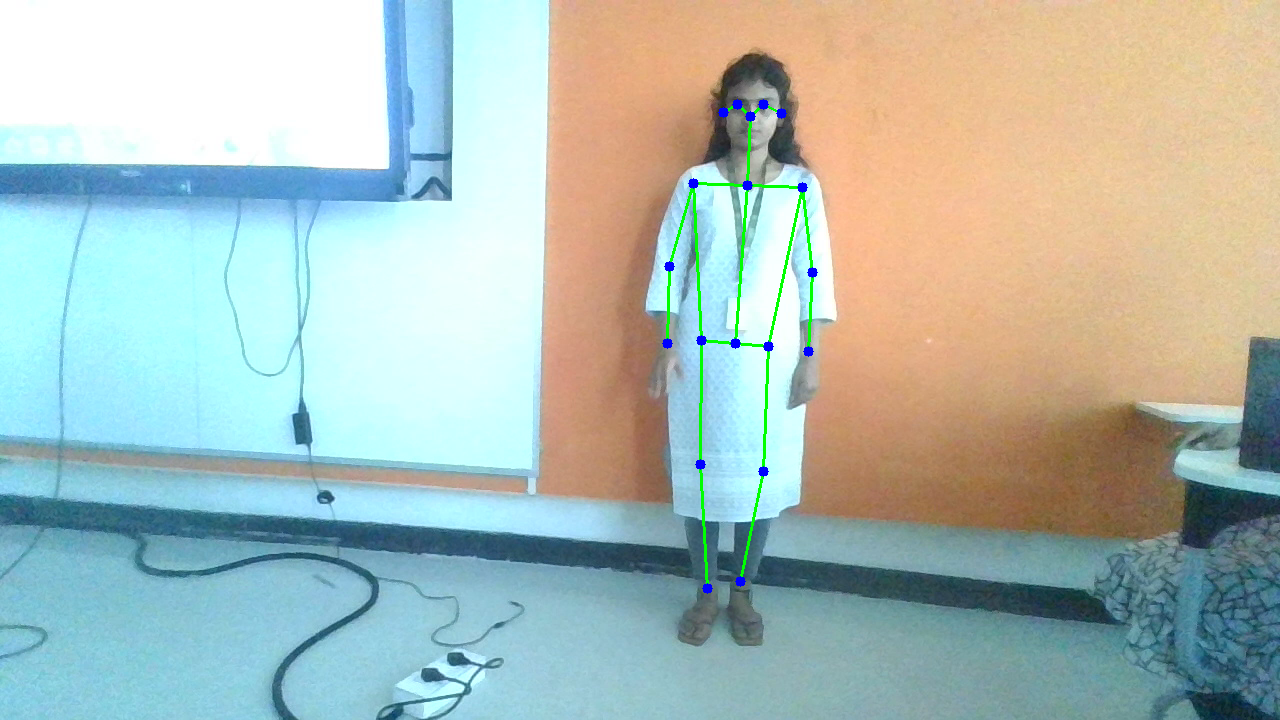

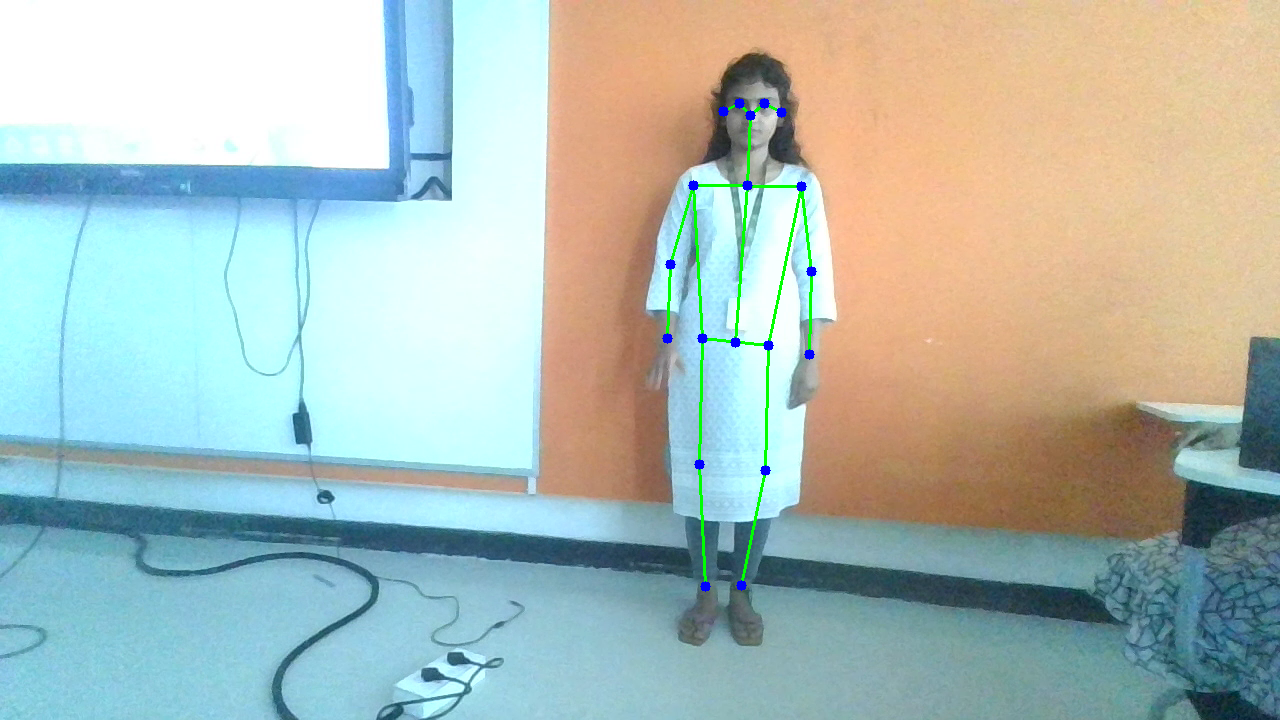

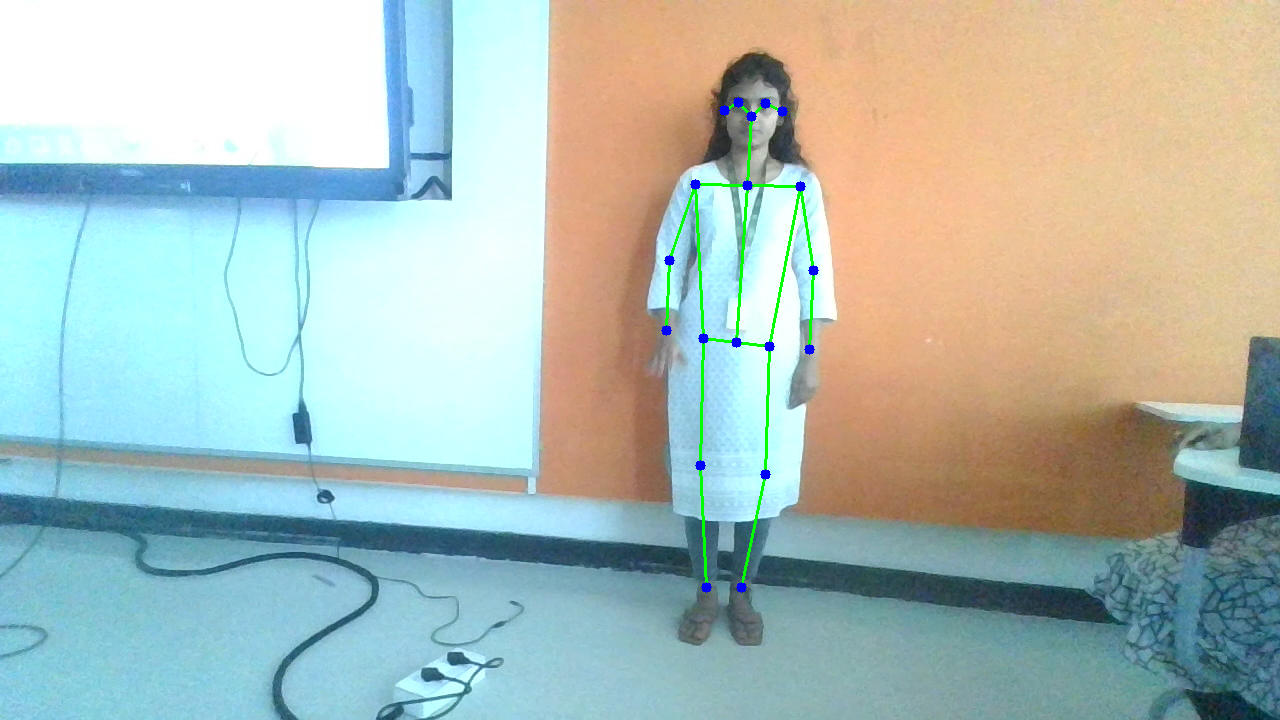

In [ ]:
# Import necessary libraries
from google.colab import files
import cv2
import torch
import torchvision.transforms as T
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from PIL import Image
import numpy as np
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore')

# Load the pre-trained pose estimation model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the keypoints list (including fingers)
keypoints_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
                   'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                   'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
                   'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# Create a dictionary to map keypoint names to their indices
keypoints_dict = {keypoint: i for i, keypoint in enumerate(keypoints_names)}

# Define the skeleton connections
skeleton_connections = [
    ('nose', 'left_eye'), ('nose', 'right_eye'),
    ('left_eye', 'left_ear'), ('right_eye', 'right_ear'),
    ('left_shoulder', 'right_shoulder'), ('left_shoulder', 'left_elbow'),
    ('right_shoulder', 'right_elbow'), ('left_elbow', 'left_wrist'),
    ('right_elbow', 'right_wrist'), ('left_shoulder', 'left_hip'),
    ('right_shoulder', 'right_hip'), ('left_hip', 'left_knee'),
    ('right_hip', 'right_knee'), ('left_knee', 'left_ankle'),
    ('right_knee', 'right_ankle'),('left_hip','right_hip')
]

# Define the function to draw lines connecting keypoints to form a skeleton
# Define the function to draw lines connecting keypoints to form a skeleton
def draw_skeleton_lines_with_keypoints(img, keypoints, skeleton_connections):
    # Draw skeleton lines
    for connection in skeleton_connections:
        start_keypoint, end_keypoint = connection
        start_point = (int(keypoints[keypoints_dict[start_keypoint]][0]), int(keypoints[keypoints_dict[start_keypoint]][1]))
        end_point = (int(keypoints[keypoints_dict[end_keypoint]][0]), int(keypoints[keypoints_dict[end_keypoint]][1]))
        cv2.line(img, start_point, end_point, (0, 255, 0), 2)

    head_point = (int(keypoints[keypoints_dict['nose']][0]), int(keypoints[keypoints_dict['nose']][1]))
    torso_point = (int((keypoints[keypoints_dict['left_shoulder']][0] + keypoints[keypoints_dict['right_shoulder']][0]) / 2),
                   int((keypoints[keypoints_dict['left_shoulder']][1] + keypoints[keypoints_dict['right_shoulder']][1]) / 2))
    torso_point_hip=(int((keypoints[keypoints_dict['left_hip']][0] + keypoints[keypoints_dict['right_hip']][0]) / 2),
                   int((keypoints[keypoints_dict['left_hip']][1] + keypoints[keypoints_dict['right_hip']][1]) / 2))

    cv2.line(img, head_point, torso_point, (0, 255, 0), 2)
    cv2.line(img,torso_point,torso_point_hip,(0,255,0),2)



    # Draw keypoints
    for keypoint_name, keypoint_coords in keypoints_dict.items():
        keypoint = (int(keypoints[keypoint_coords][0]), int(keypoints[keypoint_coords][1]))
        cv2.circle(img, keypoint, 5, (255, 0, 0), -1)

    cv2.circle(img, torso_point, 5, (255,0, 0), -1)  # Red circle for torso_point
    cv2.circle(img, torso_point_hip, 5, (255, 0, 0), -1)  # Red circle for torso_point_hip


# ... (rest of the code remains the same)
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Initialize video writer for output
frame_width = 1000
frame_height = 1000
out = cv2.VideoWriter('output_video_skeleton.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

# Define the transformation to apply to each frame
transform = T.Compose([T.ToTensor()])
# Process each frame of the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame and make prediction
    img_tensor = transform(frame)
    with torch.no_grad():
        prediction = model([img_tensor])

    # Get keypoints from the prediction (customize this based on your model's output format)
    keypoints = prediction[0]['keypoints'][0].numpy()

    # Draw lines and keypoints to form a skeleton
    draw_skeleton_lines_with_keypoints(frame, keypoints, skeleton_connections)

    # Display the frame with skeleton lines and keypoints
    _, img_encoded = cv2.imencode('.png', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(img_pil)

    # Write the frame with skeleton lines and keypoints to the output video
    out.write(frame)

# ... (rest of the code remains the same)
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
# Import necessary libraries
import cv2
import torch
import torchvision.transforms as T
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import os

# Load the pre-trained pose estimation model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the keypoints list (including fingers)
keypoints_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
                   'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                   'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
                   'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# Create a dictionary to map keypoint names to their indices
keypoints_dict = {keypoint: i for i, keypoint in enumerate(keypoints_names)}

# Define the skeleton connections
skeleton_connections = [
    ('nose', 'left_eye'), ('nose', 'right_eye'),
    ('left_eye', 'left_ear'), ('right_eye', 'right_ear'),
    ('left_shoulder', 'right_shoulder'), ('left_shoulder', 'left_elbow'),
    ('right_shoulder', 'right_elbow'), ('left_elbow', 'left_wrist'),
    ('right_elbow', 'right_wrist'), ('left_shoulder', 'left_hip'),
    ('right_shoulder', 'right_hip'), ('left_hip', 'left_knee'),
    ('right_hip', 'right_knee'), ('left_knee', 'left_ankle'),
    ('right_knee', 'right_ankle'), ('left_hip', 'right_hip')
]

# Define the function to draw lines connecting keypoints to form a skeleton
def draw_skeleton_lines_with_keypoints(img, keypoints, skeleton_connections):
    # Draw skeleton lines
    for connection in skeleton_connections:
        start_keypoint, end_keypoint = connection
        start_point = (int(keypoints[keypoints_dict[start_keypoint]][0]), int(keypoints[keypoints_dict[start_keypoint]][1]))
        end_point = (int(keypoints[keypoints_dict[end_keypoint]][0]), int(keypoints[keypoints_dict[end_keypoint]][1]))
        cv2.line(img, start_point, end_point, (0, 255, 0), 2)

    head_point = (int(keypoints[keypoints_dict['nose']][0]), int(keypoints[keypoints_dict['nose']][1]))
    torso_point = (int((keypoints[keypoints_dict['left_shoulder']][0] + keypoints[keypoints_dict['right_shoulder']][0]) / 2),
                   int((keypoints[keypoints_dict['left_shoulder']][1] + keypoints[keypoints_dict['right_shoulder']][1]) / 2))
    torso_point_hip = (int((keypoints[keypoints_dict['left_hip']][0] + keypoints[keypoints_dict['right_hip']][0]) / 2),
                      int((keypoints[keypoints_dict['left_hip']][1] + keypoints[keypoints_dict['right_hip']][1]) / 2))

    cv2.line(img, head_point, torso_point, (0, 255, 0), 2)
    cv2.line(img, torso_point, torso_point_hip, (0, 255, 0), 2)

    # Draw keypoints
    for keypoint_name, keypoint_coords in keypoints_dict.items():
        keypoint = (int(keypoints[keypoint_coords][0]), int(keypoints[keypoint_coords][1]))
        cv2.circle(img, keypoint, 5, (255, 0, 0), -1)

    cv2.circle(img, torso_point, 5, (255, 0, 0), -1)  # Red circle for torso_point
    cv2.circle(img, torso_point_hip, 5, (255, 0, 0), -1)  # Red circle for torso_point_hip


# Take input folder from the user
input_folder = input("Enter the path to the folder containing images: ")

# List all files in the folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process each image in the folder
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Read the image
    frame = cv2.imread(image_path)

    # Preprocess the frame and make prediction
    img_tensor = transform(frame)
    with torch.no_grad():
        prediction = model([img_tensor])

    # Get keypoints from the prediction (customize this based on your model's output format)
    keypoints = prediction[0]['keypoints'][0].numpy()

    # Draw lines and keypoints to form a skeleton
    draw_skeleton_lines_with_keypoints(frame, keypoints, skeleton_connections)

    # Display the frame with skeleton lines and keypoints
    _, img_encoded = cv2.imencode('.png', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(img_pil)

# ... (rest of the code remains the same)
    # Write the frame with skeleton lines and keypoints to the output video
    out.write(frame)

# ... (rest of the code remains the same)
cap.release()
out.release()
cv2.destroyAllWindows()


KeyboardInterrupt: ignored

In [ ]:
keypoints_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
                   'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                   'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
                   'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# Create a dictionary to map keypoint names to their indices
keypoints_dict = {keypoint: i for i, keypoint in enumerate(keypoints_names)}
print(keypoints_dict)

{'nose': 0, 'left_eye': 1, 'right_eye': 2, 'left_ear': 3, 'right_ear': 4, 'left_shoulder': 5, 'right_shoulder': 6, 'left_elbow': 7, 'right_elbow': 8, 'left_wrist': 9, 'right_wrist': 10, 'left_hip': 11, 'right_hip': 12, 'left_knee': 13, 'right_knee': 14, 'left_ankle': 15, 'right_ankle': 16}


In [ ]:
# Import necessary libraries
import os
import cv2
import torch
import torchvision.transforms as T
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from PIL import Image
import numpy as np
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore')

# Load the pre-trained pose estimation model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the keypoints list (including fingers)
keypoints_names = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
                   'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                   'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
                   'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# Create a dictionary to map keypoint names to their indices
keypoints_dict = {keypoint: i for i, keypoint in enumerate(keypoints_names)}

# Define the skeleton connections
skeleton_connections = [
    ('nose', 'left_eye'), ('nose', 'right_eye'),
    ('left_eye', 'left_ear'), ('right_eye', 'right_ear'),
    ('left_shoulder', 'right_shoulder'), ('left_shoulder', 'left_elbow'),
    ('right_shoulder', 'right_elbow'), ('left_elbow', 'left_wrist'),
    ('right_elbow', 'right_wrist'), ('left_shoulder', 'left_hip'),
    ('right_shoulder', 'right_hip'), ('left_hip', 'left_knee'),
    ('right_hip', 'right_knee'), ('left_knee', 'left_ankle'),
    ('right_knee', 'right_ankle'), ('left_hip', 'right_hip')
]

# Define the function to draw lines connecting keypoints to form a skeleton
def draw_skeleton_lines_with_keypoints(img, keypoints, skeleton_connections):
    # Draw skeleton lines
    for connection in skeleton_connections:
        start_keypoint, end_keypoint = connection
        start_point = (int(keypoints[keypoints_dict[start_keypoint]][0]), int(keypoints[keypoints_dict[start_keypoint]][1]))
        end_point = (int(keypoints[keypoints_dict[end_keypoint]][0]), int(keypoints[keypoints_dict[end_keypoint]][1]))
        cv2.line(img, start_point, end_point, (0, 255, 0), 2)

    head_point = (int(keypoints[keypoints_dict['nose']][0]), int(keypoints[keypoints_dict['nose']][1]))
    torso_point = (int((keypoints[keypoints_dict['left_shoulder']][0] + keypoints[keypoints_dict['right_shoulder']][0]) / 2),
                   int((keypoints[keypoints_dict['left_shoulder']][1] + keypoints[keypoints_dict['right_shoulder']][1]) / 2))
    torso_point_hip = (int((keypoints[keypoints_dict['left_hip']][0] + keypoints[keypoints_dict['right_hip']][0]) / 2),
                       int((keypoints[keypoints_dict['left_hip']][1] + keypoints[keypoints_dict['right_hip']][1]) / 2))

    cv2.line(img, head_point, torso_point, (0, 255, 0), 2)
    cv2.line(img, torso_point, torso_point_hip, (0, 255, 0), 2)

    # Draw keypoints
    for keypoint_name, keypoint_coords in keypoints_dict.items():
        keypoint = (int(keypoints[keypoint_coords][0]), int(keypoints[keypoint_coords][1]))
        cv2.circle(img, keypoint, 5, (255, 0, 0), -1)

    cv2.circle(img, torso_point, 5, (255, 0, 0), -1)  # Red circle for torso_point
    cv2.circle(img, torso_point_hip, 5, (255, 0, 0), -1)  # Red circle for torso_point_hip

# Specify the path to the folder containing images
folder_path = "C://s01_e01"

# Get a list of all image files in the folder and sort them
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])

# ... (rest of the code remains the same)

# Process each image in the folder
for image_file in image_files:
    # Read the image
    img_path = os.path.join(folder_path, image_file)
    frame = cv2.imread(img_path)

# Initialize video writer for output
frame_width = 640  # Adjust as needed
frame_height = 480  # Adjust as needed
out = cv2.VideoWriter('output_video_skeleton.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

# Define the transformation to apply to each frame
transform = T.Compose([T.ToTensor()])

# Process each image in the folder
for image_file in image_files:
    # Read the image
    img_path = os.path.join(folder_path, image_file)
    frame = cv2.imread(img_path)

    # Preprocess the frame and make prediction
    img_tensor = transform(frame)
    with torch.no_grad():
        prediction = model([img_tensor])

    # Get keypoints from the prediction (customize this based on your model's output format)
    keypoints = prediction[0]['keypoints'][0].numpy()

    # Draw lines and keypoints to form a skeleton
    draw_skeleton_lines_with_keypoints(frame, keypoints, skeleton_connections)

    # Display the frame with skeleton lines and keypoints
    _, img_encoded = cv2.imencode('.png', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(img_pil)

    # Write the frame with skeleton lines and keypoints to the output video
    out.write(frame)

# Release resources
out.release()
cv2.destroyAllWindows()

FileNotFoundError: ignored

In [ ]:
from imutils import paths
import cv2

In [ ]:
imagepaths=list(paths.list_images("C:\\Users\\nihar\\OneDrive\\Pictures\\Screenshots"))

In [ ]:
imagepaths

[]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os